<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Contexto-del-problema" data-toc-modified-id="Contexto-del-problema-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Contexto del problema</a></span></li><li><span><a href="#Instrucciones" data-toc-modified-id="Instrucciones-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Instrucciones</a></span></li><li><span><a href="#Desafío" data-toc-modified-id="Desafío-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Desafío</a></span><ul class="toc-item"><li><span><a href="#Carga-de-paquetes-y-lectura-de-la-base" data-toc-modified-id="Carga-de-paquetes-y-lectura-de-la-base-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Carga de paquetes y lectura de la base</a></span></li><li><span><a href="#Evaluación-de-la-estructura-de-la-base" data-toc-modified-id="Evaluación-de-la-estructura-de-la-base-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Evaluación de la estructura de la base</a></span></li><li><span><a href="#Análisis-Exploratorio" data-toc-modified-id="Análisis-Exploratorio-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Análisis Exploratorio</a></span><ul class="toc-item"><li><span><a href="#Creación-de-variables-solicitadas-(Pregunta-2)" data-toc-modified-id="Creación-de-variables-solicitadas-(Pregunta-2)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Creación de variables solicitadas (Pregunta 2)</a></span></li><li><span><a href="#Criterio-para-capturar-algo-&quot;extremo&quot;" data-toc-modified-id="Criterio-para-capturar-algo-&quot;extremo&quot;-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Criterio para capturar algo "extremo"</a></span></li><li><span><a href="#Análisis-univariado" data-toc-modified-id="Análisis-univariado-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Análisis univariado</a></span></li><li><span><a href="#Análisis-bivariado-y-series-de-tiempo" data-toc-modified-id="Análisis-bivariado-y-series-de-tiempo-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Análisis bivariado y series de tiempo</a></span><ul class="toc-item"><li><span><a href="#P1:-Distribución-de-observaciones-por-cuenca." data-toc-modified-id="P1:-Distribución-de-observaciones-por-cuenca.-3.3.4.1"><span class="toc-item-num">3.3.4.1&nbsp;&nbsp;</span>P1: Distribución de observaciones por cuenca.</a></span></li></ul></li><li><span><a href="#Clustering-según-posición-geográfica" data-toc-modified-id="Clustering-según-posición-geográfica-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Clustering según posición geográfica</a></span></li><li><span><a href="#Resumen-del-Análisis-Exploratorio" data-toc-modified-id="Resumen-del-Análisis-Exploratorio-3.3.6"><span class="toc-item-num">3.3.6&nbsp;&nbsp;</span>Resumen del Análisis Exploratorio</a></span></li></ul></li></ul></li></ul></div>

__Este proyecto fue extraído del github de la empresa Spike, con algunas modificaciones. El proyecto original se puede ver aquí (https://github.com/SpikeLab-CL/desafio_spike_cuencas).__

# Contexto del problema

Las olas de calor son eventos meteorológicos extremos (temperaturas extremas), que pueden generar impactos negativos en nuestro ecosistema. Estos impactos van desde días de verano muy calurosos, deshidratación, hasta aumento del riesgo de incendios y riesgo de aluviones por crecidas de los ríos (por derretimiento de nieve o lluvias líquidas en zonas altas de la cordillera). Dado que las olas de calor responden a patrones de circulación atmosférica que pueden ser detectadas con días e incluso semanas de anticipación, existe una oportunidad sin precedentes de intentar predecir la ocurrencia de algunos de los impactos negativos asociados a estos eventos extremos. Esto es clave en el contexto de calentamiento global, en donde la frecuencia a escala global de este tipo de eventos extremos ha aumentado en el último siglo (https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2012GL053361). Para explorar esta potencial predictibilidad de los impactos asociados a las olas de calor, en particular los eventos de peakflows (crecidas de ríos, los que en casos extremos pueden llegar a desbordar el cauce), Chile cuenta con una amplia red de monitoreo de variables hidro-meteorológicas. Las estaciones meteorológicas que miden temperatura y precipitación son mantenidas por la Dirección General de Aguas (DGA) y la Dirección Meteorológica de Chile. Para potenciar el uso y la generación de conocimiento en base a estos datos públicos, el Centro de Ciencia del Clima y la Resiliencia (CR2) desarrolló un explorador climático (http://explorador.cr2.cl), desde el cual se pueden visualizar y descargar estos registros.

En el explorador climático se encuentran también los datos de caudal de las estaciones fluviométricas de la DGA, los que representan el agua total que aporta una cuenca hidrográfica a una sección de río. En el CR2 también se generó una base de datos de cuencas, que provee una serie de atributos de cada área aportante a las estaciones fluviométricas (http://camels.cr2.cl), además de series meteorológicas de temperatura y caudal promediadas dentro de la cuenca (es decir, no son datos de estaciones puntuales, sino que agregados espacialmente sobre el polígono de cada cuenca).

Algunas de las __preguntas claves__ que en Chile debemos responder son:

a) ¿Ha aumentado la frecuencia de olas de calor en Chile? Para esto se deben analizar las estaciones de temperatura.

b) ¿Existe una relación entre olas de calor y eventos extremos de caudal?

c) De existir una relación entre olas de calor y eventos extremos de caudal, ¿se puede explicar este evento extremo por las características de la cuenca en donde ocurre el peakflow?


# Instrucciones

__El objetivo de este proyecto es predecir los caudales extremos__ para cuencas en Chile, y __extraer insights sobre el la evolución del comportamiento del clima chileno a lo largo de los años__. Para eso Spike ha armado un dataset usando datos públicos y reales de estaciones metereológicas.

Cada fila representa una medida de caudal diaria en una estación medidora. La medición de caudal estará asociada a características de la cuenca (fijas) y a mediciones diarias de temperatura y precipitación de estaciones cercanas.

El archivo _caudal_extra.csv_ contiene todos los datos que se necesitan para este desafío. Esta base fue producida por Spike y sintetiza la información de caudal, precipitación y temperatura.

__Nota sobre la producción de la base:__ Las estaciones que miden el caudal y las que miden la temperatura y la precipitación no están en el mismo lugar. Para construir esta base, se tomó el polígono de la cuenca aguas arriba que corresponde a la estación de caudal y luego se identificaron las estaciones de temperatura y precipitación que se encuentran en ese polígono. En muchos casos hay más de una estación, así que, por simpleza, se calculó el promedio de todas esas estaciones. De esta manera, cada día de medición de caudal va a estar asociada a una única medición de temperatura y de precipitación relevante (aunque puede haber cuencas sin estaciones de temperatura o precipitación).

La base pesa 256 megas. Esta base tiene las siguientes variables:

- codigo_estacion: el código de la estación de medición de caudal.
- nombre: nombre del lugar en la cuenca donde está la estación.
- fecha: día de medición.
- caudal: medición de caudal de ese día.
- gauge_id: id de la cuenca.
- precip_promedio: precipitación promedio de ese día en la cuenca.
- temp_max_promedio: temperatura máxima promedio de ese día en la cuenca.

# Desafío

1. Analizar el dataset __caudal_extra.csv__. ¿Qué se puede decir de los datos, distribuciones, missing values, u otros?
2. Crear tres variables llamadas

 - caudal_extremo  
 - temp_extremo  
 - precip_extremo  

Dichas variables toman valor 1 un día si el caudal/temperatura/precipitación (según sea el caso) observado ese día es extremo. Esto significa que es mayor a lo "esperado". Para capturar esta idea, el valor de caudal, por ejemplo, toma valor 1 si está sobre el percentil 95 de ese caudal para esa estación del año (Verano, Primavera, Otoño, Invierno). Toma valor 0 cuando está bajo ese percentil. En otras palabras, para cada estación de medición y para cada estación del año, se debe considerar la distribución histórica de caudal/temperatura/precipitación para elegir ese percentil 95.

Esta medida toma en cuenta la estacionalidad, pues, por ejemplo, una temperatura de 25 grados en invierno puede ser extrema, pero en verano es normal. También toma en cuenta que cada cuenca (o estáción) es diferente. Lo que es extremo para una cuenca no lo es para otra.

¿Parece razonable esta medida para capturar algo "extremo"? ¿Hay alguna alternativa mejor? ¿Cuál?

3. Analizar la variable caudal_extremo. ¿Los comportamientos en diferentes cuencas son muy diferentes?
4. Hacer un plot del porcentaje de eventos extremos a través del tiempo (caudal_extremo, temp_extremo, precip_extremo). ¿Se han vuelto más o menos comunes?
5. Predicción de la variable binaria caudal_extremo. Desarrolla uno o varios modelos usando el/los algoritmos que prefieras. ¿Qué datos podemos usar y cuáles no? Por supuesto, no podemos usar datos del futuro, pero ¿es lícito usar información del mismo día? ¿del día anterior? Todo depende de cómo propongas que el modelo se puede usar. Haz una propuesta de cómo usar tu modelo en la práctica (por ejemplo: una vez entrenado, voy a tomar los datos de XXX hasta el lunes y predecir para el día siguiente). Dada la propuesta, declara restricciones de información para caudal, temperatura, y precipitación.
6. Análisis de resultado del modelo
 - a) ¿Qué performance tiene el modelo? ¿Qué métricas usaste para medir esa performance? ¿Cuáles son las variables más importantes? ¿Qué opinión te merecen los resultados?
 - b) Si quisiéramos capturar alrededor de un 70% de los eventos de caudales extremos. ¿Cuál es la precisión de tu modelo con ese porcentaje de captura? ¿Te parece útil?.
 
__NOTA: Debido a que el objetivo de este notebook es presentarlo como un proyecto de portafolio, las preguntas del desafío se responden indirectamente.__

## Carga de paquetes y lectura de la base

In [1]:
#install.packages("BBmisc")
#install.packages("tidyverse")
#install.packages("ggstance")
#install.packages("caret")
#install.packages("grid")
#install.packages("gridExtra")
#install.packages("ggmap")
#install.packages("sf")
#install.packages("mclust")
library(BBmisc)
library(tidyverse)
library(magrittr)
library(ggthemes)
library(ggstance)
library(GGally)
library(sf)
library(mclust)


Attaching package: 'BBmisc'

The following object is masked from 'package:base':

    isFALSE

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::coalesce() masks BBmisc::coalesce()
x dplyr::collapse() masks BBmisc::collapse()
x dplyr::filter()   masks stats::filter()
x dplyr::lag()      masks stats::lag()

Attaching package: 'magrittr'

The following object is masked from 'package:purrr':

    set_names

The following object is masked from 'package:tidyr':

    extract


Attaching package: 'ggstance'

The following objects are masked from 'package:ggplot2':

    geom_errorbarh, GeomErrorbarh

Registered S3 method ov

In [2]:
# Set-up: facilidades y funciones propias
theme_set(theme_minimal() +
            theme(axis.title.x = element_text(size = 12, hjust = 1),
                  axis.title.y = element_text(size = 12),
                  axis.text.x = element_text(size = 10),
                  axis.text.y = element_text(size = 10),
                  panel.grid.major = element_line(linetype = 2),
                  panel.grid.minor = element_line(linetype = 2),
                  plot.title = element_text(size = 13, colour = "grey25", face = "bold"), 
                  plot.subtitle = element_text(size = 11, colour = "grey44")))

Missing_Plot_df <- function(dataframe){
    titulo <- paste0("Base ",deparse(substitute(dataframe)))
    dataframe <- dataframe[,colSums(is.na(dataframe)) > 0]
    missing.values <- dataframe %>%
      gather(key = "key", value = "val") %>%
      mutate(isna = is.na(val), val=NULL) %>%
      group_by(key) %>%
      mutate(total = n()) %>%
      group_by(key, total, isna) %>%
      summarise(num.isna = n()) %>%
      mutate(pct = num.isna / total * 100)

    cols <- (missing.values  %>% filter(isna == TRUE) %>% arrange(desc(pct)))$key

    percentage.plot <- missing.values %>%
          ggplot() +
            geom_bar(aes(x = reorder(key, desc(pct)), 
                         y = pct, fill=isna), 
                     stat = 'identity', alpha= 0.8) +
          scale_x_discrete(limits = cols) +
          scale_fill_manual(name = "", 
                            values = c('royalblue2', 'tomato3'), 
                            labels = c("Presente", "Missing")) +
          coord_flip() +
          labs(title = "Porcentaje de missing values", x = 'Variable', y = "% de missing values")

    row.plot <- dataframe %>%
    select(cols) %>%
      mutate(id = row_number()) %>%
      gather(-id, key = "key", value = "val") %>%
      mutate(isna = is.na(val), val=NULL) %>%
      ggplot(aes(key, id, fill = isna)) +
        geom_tile() +
    scale_x_discrete(limits = cols) +
        scale_fill_manual(name = "",
            values = c('royalblue2', 'tomato3'),
            labels = c("Presente", "Missing")) +
        labs(x = "Variable", y = "Número de fila", title = "Missing values en filas") +
        coord_flip()
    
    gridExtra::grid.arrange(percentage.plot, row.plot, ncol = 2)
    
}

In [3]:
# Leemos la base de datos
df <- read.csv("caudal_extra.csv", stringsAsFactors = FALSE, check.names = FALSE)

## Evaluación de la estructura de la base

In [4]:
df %>% head(3)
str(df)

,codigo_estacion,institucion,fuente,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio
0,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06 00:00:00+00:00,0.812,4540001,Rio Grande En Paloma 1,0,NA
1,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27 00:00:00+00:00,0.236,4540001,Rio Grande En Paloma 1,0,NA
2,4540001,DGA,dga_web,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07 00:00:00+00:00,0.730,4540001,Rio Grande En Paloma 1,0,NA


'data.frame':	1411180 obs. of  17 variables:
 $                       : int  0 1 2 3 4 5 6 7 8 9 ...
 $ codigo_estacion       : int  4540001 4540001 4540001 4540001 4540001 4540001 4540001 4540001 4540001 4540001 ...
 $ institucion           : chr  "DGA" "DGA" "DGA" "DGA" ...
 $ fuente                : chr  "dga_web" "dga_web" "dga_web" "dga_web" ...
 $ nombre                : chr  "Rio Grande En Paloma 1" "Rio Grande En Paloma 1" "Rio Grande En Paloma 1" "Rio Grande En Paloma 1" ...
 $ altura                : int  310 310 310 310 310 310 310 310 310 310 ...
 $ latitud               : num  -30.7 -30.7 -30.7 -30.7 -30.7 ...
 $ longitud              : num  -71.1 -71.1 -71.1 -71.1 -71.1 ...
 $ codigo_cuenca         : int  45 45 45 45 45 45 45 45 45 45 ...
 $ nombre_sub_cuenca     : chr  "Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)" "Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)" "Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)" "Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)" ...
 $ ca

Vemos que tenemos una base con 1.411.180 filas y 17 variables, donde son 11 numéricas, 5 categóricas, y 1 fecha. Cambiaremos las variables a sus datatypes correspondientes.

In [5]:
# Cambiamos las variables a sus datatypes correspondientes.
df[,1] <- NULL
df$fecha <- df$fecha %>% as.Date() # Transformamos la fecha a formato fecha

# Transformamos los códigos a factor, por eficiencia
df$codigo_estacion <- as.factor(df$codigo_estacion)
df$codigo_cuenca <- as.factor(df$codigo_cuenca)
df$gauge_id <- as.factor(df$gauge_id)

In [6]:
# Evaluamos los valores únicos por variable
df %>% 
  sapply(function(x) NROW(unique(x)))

codigo_estacion            institucion                 fuente 
                   133                      1                      1 
                nombre                 altura                latitud 
                   133                    101                    133 
              longitud          codigo_cuenca      nombre_sub_cuenca 
                   130                     29                     78 
cantidad_observaciones                  fecha                 caudal 
                   132                  21252                  29154 
              gauge_id             gauge_name        precip_promedio 
                   133                    133                  33005 
     temp_max_promedio 
                 35730

In [7]:
# Eliminamos las columnas con una sola categoría/valor (y reducimos la dimensionalidad de la base).
df$institucion <- NULL
df$fuente <- NULL

## Análisis Exploratorio

### Creación de variables solicitadas (Pregunta 2)

Al definir las fechas de las estaciones del año, se asume como marginal las diferencias horarias anuales en relación a las estaciones del año, así como también se asume que dichas estaciones comienzan el día 21 y terminan el día 20 con el fin de evitar múltiples estaciones del año en un mismo día. Por lo tanto, las fechas definidas por estación son:
* Verano: 21 diciembre al 20 marzo.
* Otoño: 21 marzo al 20 de Junio.
* Invierno: 21 de Junio al 20 de septiembre.
* Primavera: 21 de Septiembre al 20 de diciembre.

In [8]:
## Creación de estaciones del año y de las variables solicitadas

df$mes <- lubridate::month(df$fecha) # variable auxiliar para utilizar en ifelse
df$dia <- lubridate::day(df$fecha) # variable auxiliar para utilizar en ifelse
df$estacion_ano <- ifelse((df$mes == 3 & df$dia >=21)| df$mes %in% c(4,5) | (df$mes == 6 & df$dia <=20),"Otoño",
                          ifelse((df$mes == 6 & df$dia >=21)| df$mes %in% c(7,8) | (df$mes == 9 & df$dia <=20),"Invierno",
                                 ifelse((df$mes == 9 & df$dia >=21)| df$mes %in% c(10,11) | (df$mes == 12 & df$dia <=20),"Primavera","Verano")))
df$mes <- NULL
df$dia <- NULL

# CREACIÓN DE VARIABLES EXTREMAS SEGÚN ESTACIÓN DEL AÑO Y codigo_estacion.
# 1) Se agrupa por codigo de estación y por estación de año, para luego crear la variable respectiva
df %<>%
  group_by(., codigo_estacion, estacion_ano) %>%
  mutate(., caudal_extremo = ifelse(caudal > quantile(caudal, 0.95, na.rm=TRUE),1,0))
df %<>%
  group_by(., codigo_estacion, estacion_ano) %>%
  mutate(., temp_extremo = ifelse(temp_max_promedio > quantile(temp_max_promedio, 0.95, na.rm=TRUE),1,0))
df %<>%
  group_by(., codigo_estacion, estacion_ano) %>%
  mutate(., precip_extremo = ifelse(precip_promedio > quantile(precip_promedio, 0.95, na.rm=TRUE),1,0)) %>%
  ungroup()

df %>% head(3)

codigo_estacion,nombre,altura,latitud,longitud,codigo_cuenca,nombre_sub_cuenca,cantidad_observaciones,fecha,caudal,gauge_id,gauge_name,precip_promedio,temp_max_promedio,estacion_ano,caudal_extremo,temp_extremo,precip_extremo
4540001,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-01-06,0.812,4540001,Rio Grande En Paloma 1,0,NA,Verano,0,NA,0
4540001,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-03-27,0.236,4540001,Rio Grande En Paloma 1,0,NA,Otoño,0,NA,0
4540001,Rio Grande En Paloma 1,310,-30.6833,-71.05,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado),11575,1960-05-07,0.730,4540001,Rio Grande En Paloma 1,0,NA,Otoño,0,NA,0


### Criterio para capturar algo "extremo"

Del enunciado se entiende que se busca predecir el nivel del caudal para prevenir o minimizar (según las capacidades disponibles) desbordes de ríos e inundaciones de sectores de las ciudades. En consecuencia, un nivel extremo de un caudal determinado debiese implicar o estar cerca de un peligro de desborde.

Sin embargo, al definir como caudal_extremo desde el percentil 95 histórico por estación del año, se está asumiendo que desde el percentil 95 es un peligro de desborde, cuando incluso podría ser completamente seguro desde el percentil 99 debido a que no estamos considerando la capacidad del caudal, sino que sólo estamos considerando los datos históricos. En consecuencia, si un caudal nunca ha estado ni cerca de desbordarse, aún así se definirán valores extremos para dicho caudal. Por ejemplo, si un caudal tiene capacidad de 100 metros cúbicos por minuto y el máximo histórico por estación del año de dicho caudal no supera los 40 metros cúbicos por minuto, aún así tendrá mediciones clasificadas como extremas a pesar de no superar nunca ni siquiera la mitad de su capacidad. Por lo tanto, ¿qué medición podría ser más precisa?

Como cada caudal tiene una capacidad determinada, habría que evaluar desde qué porcentaje de su capacidad (o valor de medición) puede catalogarse el flujo del caudal como extrema. Y si la medición del caudal es mayor a dicha cota, sea automáticamente catalogada como extrema. Por lo tanto, una medición más precisa podría ser definir un porcentaje de capacidad (o flujo absoluto) por caudal que implique un riesgo de desborde determinado, independientemente de la estación del año (a menos que la capacidad del caudal cambie según la estación del año).

Y tanto para el caso de las temperaturas como las precipitaciones extremas aplicaría el mismo critero sin perder el foco del objetivo: medir el riesgo de desborde del caudal. Por lo tanto, las preguntas a responder serían ¿Hay alguna temperatura por caudal o geografía (latitud y longitud) que haga aumentar el flujo de agua a través del derretimiento de hielos? Si es así, ¿Se podría determinar dicha temperatura por caudal como límite de normalidad?. Y por el lado de las precipitaciones, ¿qué niveles de precipitaciones empiezan a afectar o a incrementar el riesgo de desborde de un caudal determinado? ¿Son predecibles con precisión? ¿Con cuántos días de anticipación?

Las respuestas a estas preguntas podrían clasificar de mejor manera las medidas extremas con el fin de medir de mejor manera los riesgos de un desborde.

### Análisis univariado

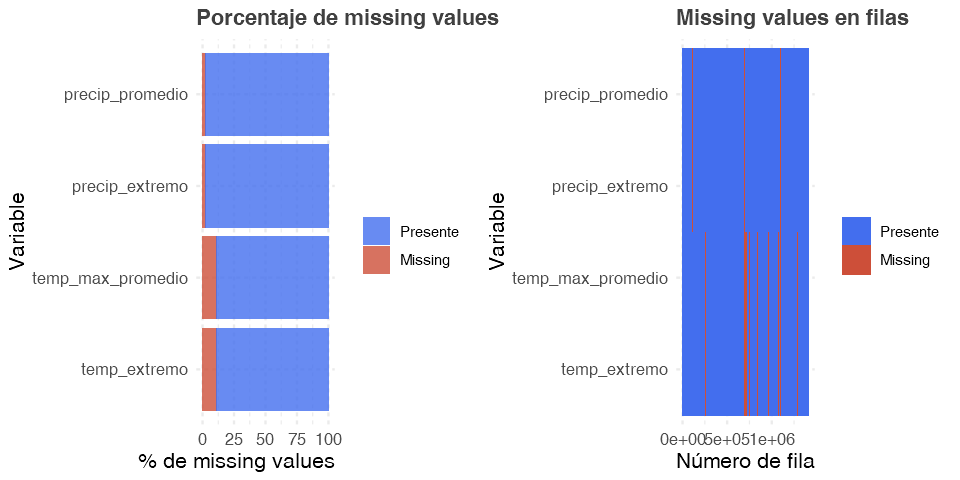

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
Missing_Plot_df(df)

A primera vista, no parecen existir mayores cantidades de missing values.

In [10]:
# Valores únicos por variable
sapply(df, function(z) if(length(unique(z)) <=10) 
{paste0(length(unique(z)), " valores únicos. Los cuales son: ", toString(unique(z)))}
    else {length(unique(z))})

codigo_estacion 
                                                                 "133" 
                                                                nombre 
                                                                 "133" 
                                                                altura 
                                                                 "101" 
                                                               latitud 
                                                                 "133" 
                                                              longitud 
                                                                 "130" 
                                                         codigo_cuenca 
                                                                  "29" 
                                                     nombre_sub_cuenca 
                                                                  "78" 
                                                cantidad_observaciones 
                                                                 "132" 
                                                                 fecha 
                                                               "21252" 
                                                                caudal 
                                                               "29154" 
                                                              gauge_id 
                                                                 "133" 
                                                            gauge_name 
                                                                 "133" 
                                                       precip_promedio 
                                                               "33005" 
                                                     temp_max_promedio 
                                                               "35730" 
                                                          estacion_ano 
"4 valores únicos. Los cuales son: Verano, Otoño, Invierno, Primavera" 
                                                        caudal_extremo 
                              "2 valores únicos. Los cuales son: 0, 1" 
                                                          temp_extremo 
                          "3 valores únicos. Los cuales son: NA, 0, 1" 
                                                        precip_extremo 
                          "3 valores únicos. Los cuales son: 0, 1, NA"

Las únicas variables que __no__ son características de las cuencas son: `fecha`, `caudal`, `precip_promedio`, y `temp_max_promedio`.

In [11]:
# Intentamos ver las relaciones de las variables características
df %>% select(codigo_estacion, nombre, gauge_id, gauge_name) %>% unique() %>% NROW()
df %>% select(codigo_estacion, nombre, gauge_id, gauge_name, codigo_cuenca, nombre_sub_cuenca) %>% unique() %>% NROW()
df %>% select(codigo_estacion, nombre, gauge_id, gauge_name, codigo_cuenca, nombre_sub_cuenca) %>% unique() %>% head()

[1] 133

[1] 133

codigo_estacion,nombre,gauge_id,gauge_name,codigo_cuenca,nombre_sub_cuenca
4540001,Rio Grande En Paloma 1,4540001,Rio Grande En Paloma 1,45,Rio Grande Bajo (Entre E Paloma Y Rio Hurtado)
10414001,Rio Maullin En Las Quemas,10414001,Rio Maullin En Las Quemas,104,Rio Maullin
11040001,Rio Palena Bajo Junta Rosselot,11040001,Rio Palena Bajo Junta Rosselot,110,Rio Palena Bajo (Bajo Junta Rosselot Y Desemb)
6019003,Rio Cachapoal En Puente Arqueado (Ca),6019003,Rio Cachapoal En Puente Arqueado (Ca),60,Cachapoal Bajo
11530000,Rio Baker En Desague Lago Bertrand,11530000,Rio Baker En Desague Lago Bertrand,115,Rio Baker Des. Lago G. Carrera Y R De La Colonia
10311001,Rio Bueno En Bueno,10311001,Rio Bueno En Bueno,103,Rio Bueno Entre Lago Ranco Y Rio Pilmaiquen


In [12]:
identical(df$codigo_estacion, df$gauge_id)
identical(df$nombre, df$gauge_name)

[1] TRUE

[1] TRUE

Del enunciado y de lo anterior podemos decir que:
- `codigo_estacion` y `gauge_id` son idénticos, así como `nombre` y `gauge_name`. Eliminaremos `gauge_id` y `gauge_name`.
- Se desconoce lógica de la variable `codigo_cuenca`, dado que no está en la descripción.

In [13]:
# Eliminación de gauge_id y gauge_name
df$gauge_id <- NULL
df$gauge_name <- NULL

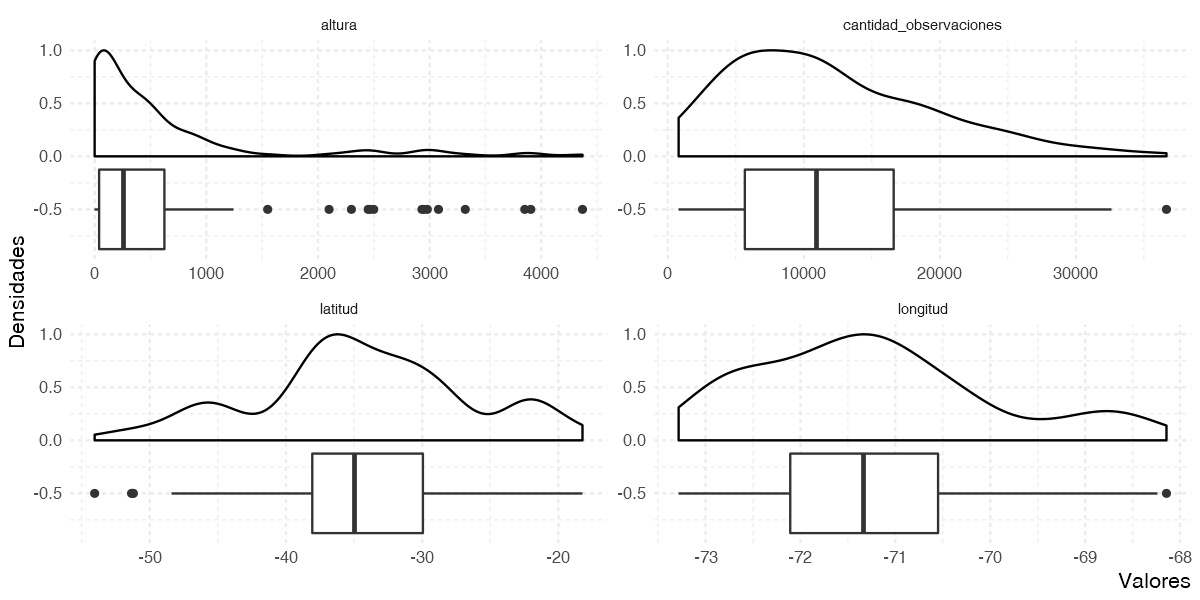

In [14]:
# Gráfico de las variables características de las cuencas
options(repr.plot.width=10, repr.plot.height=5)
cols_caract <- c('latitud', 'longitud', 'altura', 'cantidad_observaciones')
df %>%
select(codigo_estacion, cols_caract) %>%
unique() %>% select(-codigo_estacion) %>%
gather(na.rm=TRUE) %>%
    ggplot(aes(x=value, y = -0.5)) +
    geom_boxploth() +
    geom_density(aes(x = value, y = stat(scaled)), inherit.aes = FALSE) +
labs(x= "Valores",
    y= "Densidades") +
    facet_wrap(~ key, scales="free")

 - Las cuencas tienden a concentrarse en alturas menores de mil metros.
 - Existe una importante diferencia en las observaciones por cuenca. Esto implica que las cuencas no tienden a tener la misma cantidad de datos registrados.
 - Como las latitudes extremas del territorio continental chileno son -55° y -17° grados aproximadamente, del gráfico podemos deducir que las cuencas se encuentran a lo largo de todo el territorio chileno, con una concentración relevante en la zona central. En el territorio más ancho de Chile, el sur patagónico, las longitudes alcanzan los -75° y -68° longitud, donde probablemente las cuencas mayores a 70° longitud se encuentren en la patagonia chilena.

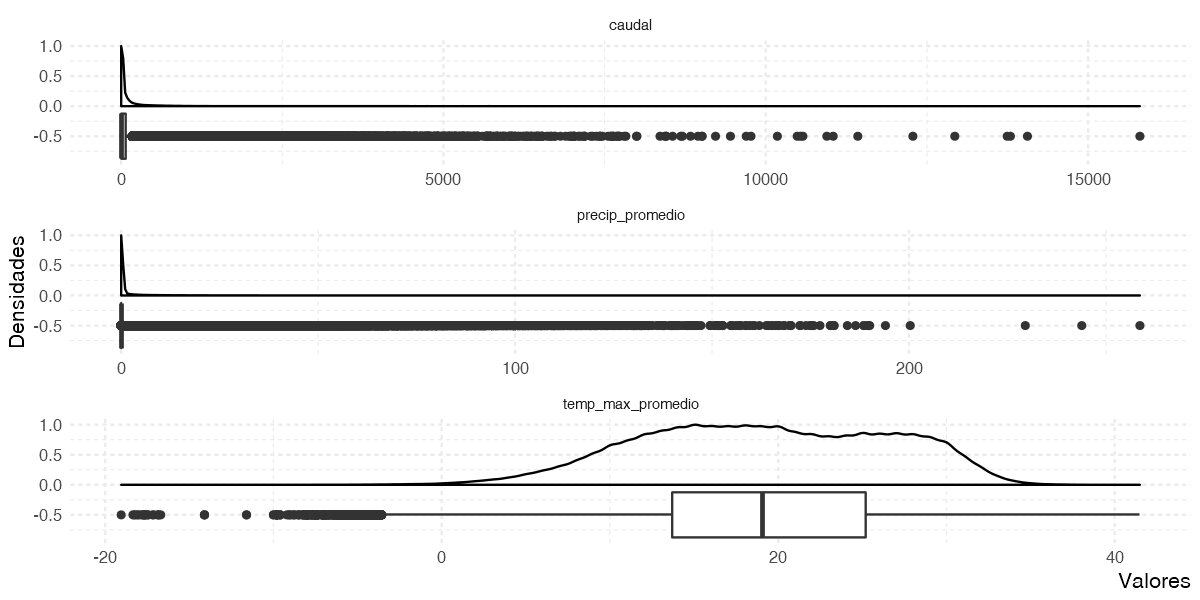

In [15]:
# Gráfico de las mediciones registradas en las cuencas
cols_datos <- c('fecha', 'caudal', 'precip_promedio', 'temp_max_promedio')

df %>%
select(cols_datos, -fecha) %>%
gather(na.rm=TRUE) %>%
    ggplot(aes(x=value, y = -0.5)) +
    geom_boxploth() +
    geom_density(aes(x = value, y = stat(scaled)), inherit.aes = FALSE) +
labs(x= "Valores",
    y= "Densidades") +
    facet_wrap(~ key, scales="free", nrow = 3)

 - Las variables `caudal` y `precip_promedio` tienen distribuciones (muy) sesgadas a la derecha, lo que podría sesgar las predicciones. La `temp_max_promedio` presenta una distribución parecida a una normal. Es entendible que las precipitaciones diarias promedio tiendan a 0, dado que no todos los días llueve, pero que el nivel de caudal de las cuencas tienda a 0 podría decirse que dichos caudales están secos. Luego profundizaremos en esto.

In [16]:
# Rango de fechas
paste0("La base de datos tiene un rango de fechas desde ", 
       df$fecha %>% unique() %>% min(), " hasta ",
       df$fecha %>% unique() %>% max())

[1] "La base de datos tiene un rango de fechas desde 1960-01-02 hasta 2018-03-09"

### Análisis bivariado y series de tiempo

__Input de análisis anterior__

Pregunta 1 (P1). Dado que ahora sabemos que las cuencas no tienden a tener la misma cantidad de observaciones, implicando que la cantidad de registros por cuenca no es la misma, ¿cómo se distribuye esta falta de registros por año y por cuenca? ¿Cómo es dicha evolución a lo largo de los años?

P2. ¿Por qué hay tantas cuencas con niveles de caudales iguales a 0? ¿Tienen alguna relación con el nivel de precipitaciones o temperaturas de la misma cuenca?

__HIPÓSTESIS/STATEMENTS A EVALUAR (basadas en intuición y lógica)__

__H1__: A menor altura, mayor debería ser la probabilidad de ocurrencia de un caudal extremo debido a que mayor es la acumulación de agua porque, (1) a medida que se desciende de la montaña mayor es la temperatura por lo que mayor es el descongelamiento de hielos lo que debería implicar un mayor caudal, y (2) debido a la acumulación misma del agua a medida que se desciende por la montaña. 

__H2__: El comportamiento de la cuenca tiende a ser similar a las cuencas cercanas. Se buscará agrupar las cuencas por sector/geografía según la latitud y longitud de cada cuenca.

#### P1: Distribución de observaciones por cuenca.

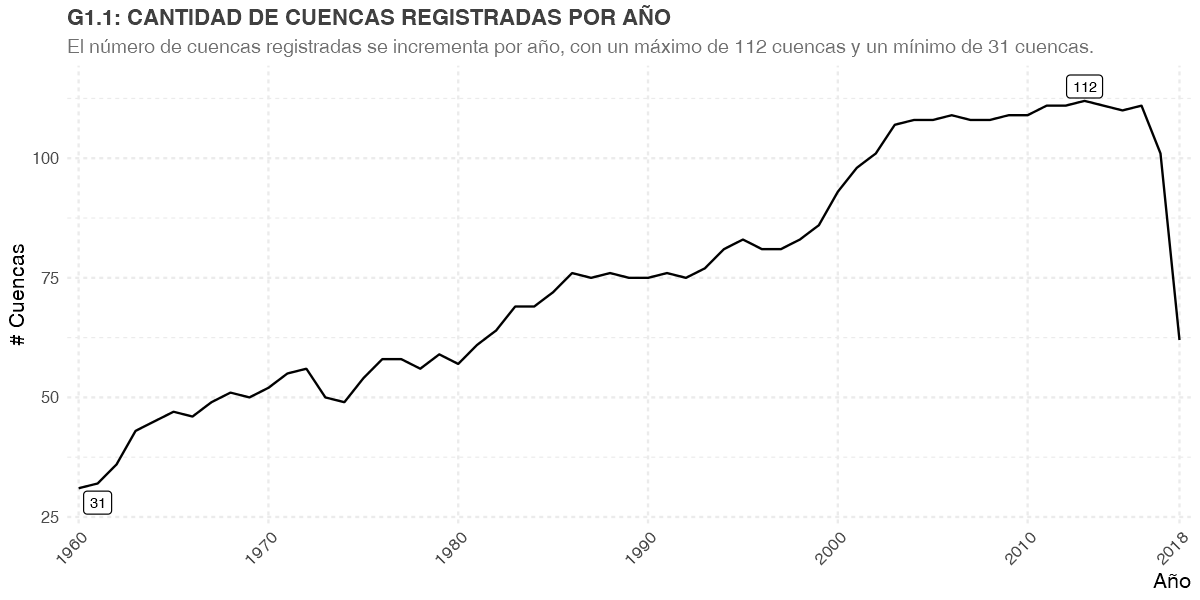

In [17]:
# Cantidad de registros anuales por cuenca
Cuencas_per_year <- function(dataframe){
    z <- dataframe %>% 
            select(codigo_estacion, fecha) %>% 
            mutate(year = lubridate::year(fecha), fecha=NULL) %>% 
            unique() %>%
            group_by(year) %>%
            summarise(count = n())
    return(z)
}
Cuencas_per_year(df) %>%
ggplot(aes(x= as.factor(year), y=count, label=count)) +
geom_line(group=1) +
geom_label(data = Cuencas_per_year(df) %>% filter(count == max(count)), nudge_y=3, size=3) +
geom_label(data = Cuencas_per_year(df) %>% filter(count == min(count)), nudge_x=1, nudge_y=-3, size=3) +
ggtitle("G1.1: CANTIDAD DE CUENCAS REGISTRADAS POR AÑO", 
        subtitle = "El número de cuencas registradas se incrementa por año, con un máximo de 112 cuencas y un mínimo de 31 cuencas.") +
  labs(x= "Año", y= "# Cuencas") +
scale_x_discrete(breaks=c(seq(1960, 2010, 10), 2018)) +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

- Hay cuencas en el año 2010 que no tienen registros previos al año 2000, y hay aún menos cuencas con registros en el año 1960. Sin embargo, con esto no es suficiente saber si las cuencas han sido las mismas a lo largo de los años (por ejemplo, no podemos saber que las 31 cuencas de 1960 estén dentro de las 121 cuencas del año 2013). Por tanto, nacen dos preguntas:
 * ¿Cuál es el último registro de cada cuenca?
 * ¿Cómo es la evolución anual de las observaciones de cada cuenca?

In [18]:
# Último registro de cada cuenca
paste("Mes y año del último registro de cada cuenca")
df %>% 
group_by(codigo_estacion) %>%
summarise(last_date = max(zoo::as.yearmon(fecha, "%m/%Y"))) %>%
arrange(last_date) %>% 
pull(last_date) %>% table()

[1] "Mes y año del último registro de cada cuenca"

.
 feb. 1983  mar. 1983 sept. 1983  may. 1984  jul. 1984  ago. 1984  dic. 1984 
         1          1          1          1          1          1          1 
 dic. 1987  ene. 1988  mar. 1989  ago. 1997  nov. 1998 sept. 2003  mar. 2006 
         1          1          1          1          1          1          1 
 oct. 2006  jun. 2009  ene. 2012  nov. 2012  ago. 2013  feb. 2015  mar. 2015 
         1          1          1          1          1          1          1 
 dic. 2015  mar. 2016  abr. 2016  may. 2016  jul. 2016  ago. 2016  oct. 2016 
         1          1          1          1          2          1          2 
 nov. 2016  dic. 2016  ene. 2017  feb. 2017  mar. 2017  abr. 2017  may. 2017 
         1          1          1          2          1          3          4 
 jun. 2017  jul. 2017 sept. 2017  ene. 2018  feb. 2018  mar. 2018 
        12         14          2          1          2         59 

In [19]:
paste("Último día de registro de cada cuenca, para el año 2018:")
df %>% 
mutate(year = lubridate::year(fecha)) %>%
filter(year == 2018) %>%
group_by(codigo_estacion) %>%
summarise(last_date = max(fecha, "%m/%Y")) %>% 
arrange(last_date) %>% 
pull(last_date) %>% as.character() %>%
table()

[1] "Último día de registro de cada cuenca, para el año 2018:"

.
2018-01-01 2018-02-15 2018-02-17 2018-03-03 2018-03-09 
         1          1          1          1         58 

- Se puede concluir que, actualmente, se actualizan/registran los datos de 58 cuencas de un total de 133 que están en la base. En consecuencia, se hace innecesario predecir los caudales extremos de las cuencas que ya no se registran datos, por lo que filtraremos la base dejando solamente estas 58 cuencas.

In [20]:
# filtro 58 cuencas
id_58_estaciones <- df %>% select(fecha, codigo_estacion) %>% filter(fecha == "2018-03-09") %>% pull(codigo_estacion)

df <- df %>% filter(codigo_estacion %in% id_58_estaciones)
df$codigo_estacion <- droplevels(df$codigo_estacion)

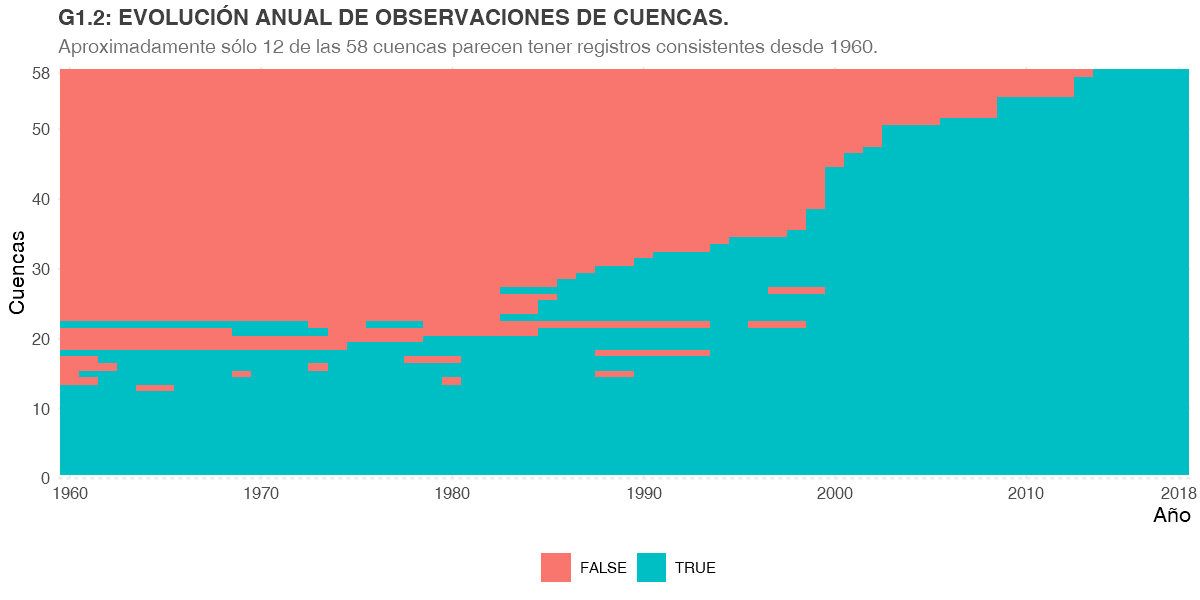

In [21]:
# Gráfico de registro anual, por cuenca y por año
df %>%
select(codigo_estacion, fecha) %>%
mutate(year = factor(as.character(lubridate::year(fecha)), levels=1960:2018), 
       fecha=NULL,
      mutate = as.integer(codigo_estacion)) %>% 
unique() %>%
mutate(flag = TRUE) %>%
complete(codigo_estacion, year, fill = list(flag = FALSE)) %>%
group_by(codigo_estacion) %>% mutate(order = sum(!flag)) %>%
ggplot(aes(year, as.numeric(reorder(codigo_estacion, order)), fill = flag)) + 
geom_tile() +
scale_x_discrete(breaks=c(seq(1960, 2010, 10), 2018)) +
scale_y_discrete(limits=c(seq(0,50,10), 58)) +
ggtitle("G1.2: EVOLUCIÓN ANUAL DE OBSERVACIONES DE CUENCAS.", 
        subtitle = "Aproximadamente sólo 12 de las 58 cuencas parecen tener registros consistentes desde 1960.") +
  labs(x= "Año", y= "Cuencas") +
theme(legend.title = element_blank(),
     legend.position = "bottom")

 - Es altamente probable que la diferencia de observaciones entre cuencas se deba a que la instalación de estaciones de medición es paulatina a lo largo de los años, dando como resultado la falta de observaciones previas al momento de su instalación, así como también los múltiples vacíos anuales de varias cuencas.
 - No olvidar que los TRUE del gráfico anterior son las cuencas que tienen al menos una observación en dicho año. En consecuencia, veremos las distribuciones de la cantidad de observaciones anuales por cuenca.

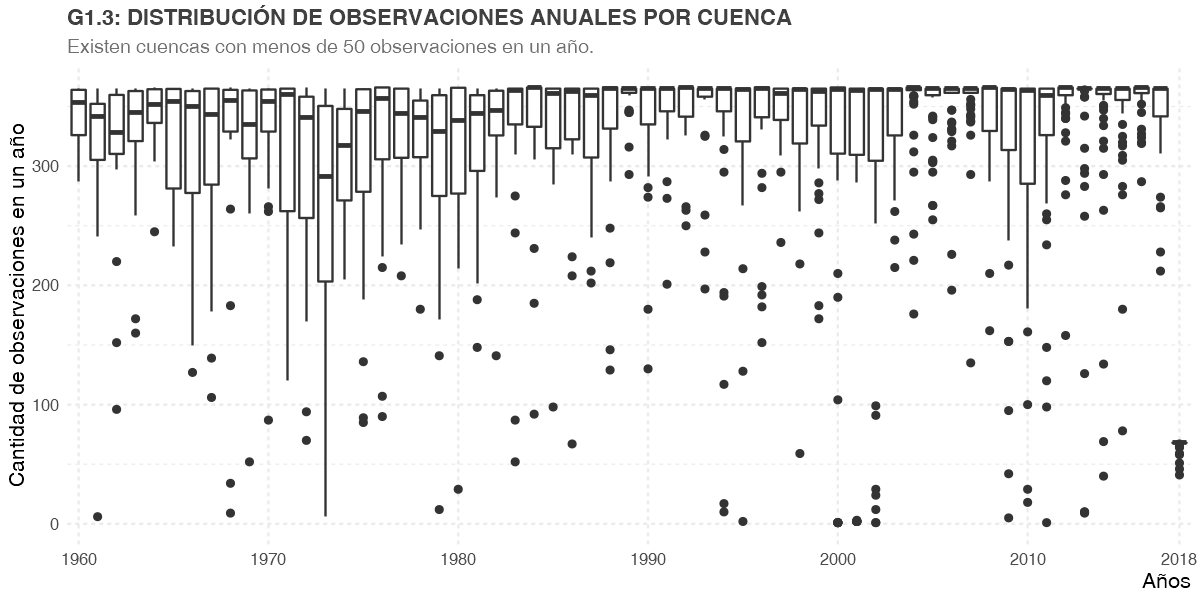

In [22]:
# Cantidad de datos por cuenca, por año.
df_XcuencaXyear <- df %>% select(codigo_estacion, fecha) %>%
mutate(year = lubridate::year(fecha), fecha=NULL) %>%
group_by(codigo_estacion, year) %>% 
summarise(count = n())

df_XcuencaXyear %>%
ggplot(aes(as.factor(year), count)) +
geom_boxplot() +
scale_x_discrete(breaks=c(seq(1960, 2010, 10), 2018)) +
ggtitle("G1.3: DISTRIBUCIÓN DE OBSERVACIONES ANUALES POR CUENCA", 
        subtitle = "Existen cuencas con menos de 50 observaciones en un año.") +
  labs(x= "Años", y= "Cantidad de observaciones en un año") +
theme(legend.position = "bottom")

Gracias al gráfico G1.3 podemos deducir que hay cuencas en el gráfico G1.2 con años que tienen menos de 50 observaciones, lo que implica que en G1.2 estamos visualizando años catalogados "con datos" cuando hay años que no superan, incluso, las 10 observaciones anuales por cuenca. En consecuencia, para tener una mejor idea de los missing values, haremos un heatmap donde la intersección de los años y la cuenca respectiva represente la cantidad de observaciones que tiene en relación al total de 365 días.

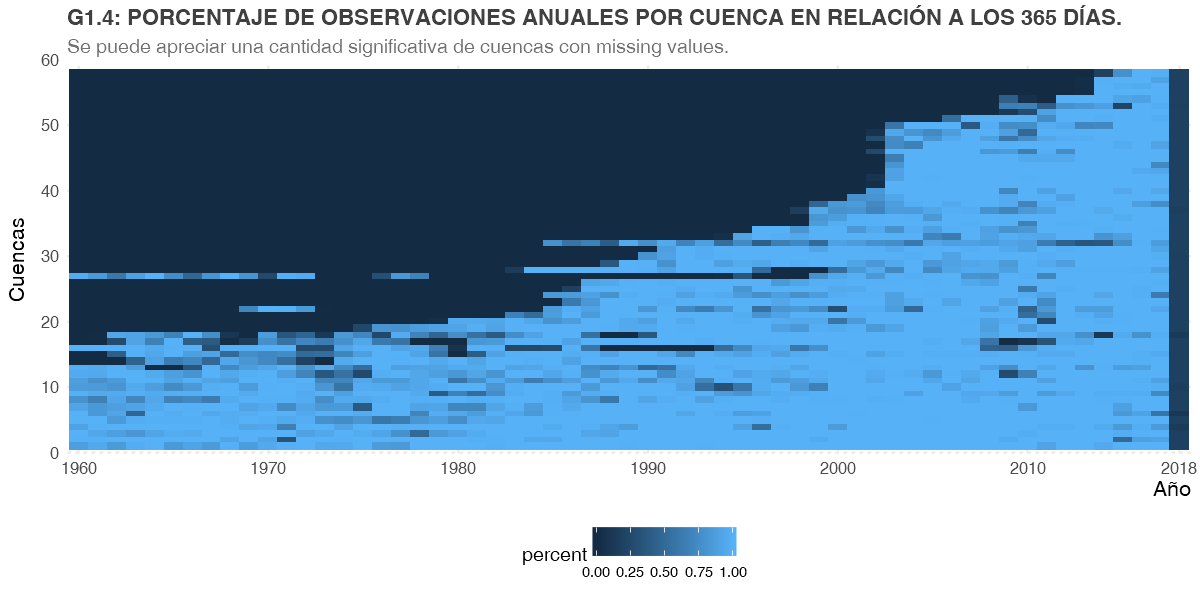

In [23]:
df %>%
select(codigo_estacion, fecha) %>%
mutate(year = factor(as.character(lubridate::year(fecha)), levels=1960:2018), 
       fecha=NULL) %>% 
group_by(codigo_estacion, year) %>% summarise(count = n(),
                                          percent = round(count/366,3)) %>%
ungroup() %>% 
arrange(count) %>%
complete(codigo_estacion, year, fill=list(count=0, percent=0)) %>%
ggplot(aes(year, as.numeric(reorder(codigo_estacion, -count)), fill = percent)) + 
geom_tile() +
scale_y_discrete(limits=seq(0,130,10)) +
scale_x_discrete(breaks=c(seq(1960, 2010, 10), 2018)) +
ggtitle("G1.4: PORCENTAJE DE OBSERVACIONES ANUALES POR CUENCA EN RELACIÓN A LOS 365 DÍAS.", 
        subtitle = "Se puede apreciar una cantidad significativa de cuencas con missing values.") +
  labs(x= "Año", y= "Cuencas") +
theme(legend.position = "bottom")

 - Podemos ver que la mayoría (si es que no todas) de las 58 cuencas tienen missing values en al menos un año de su trayectoria, aunque también se puede apreciar que la mayoría de las cuencas, en los años que sí tienen observaciones, la cantidad de observaciones suele superar el 50%. 

Por lo tanto, la diferencia en la cantidad de observaciones entre las cuencas probablemente se deba a la instalación paulatina de estaciones de medición a lo largo de los años. Además, como se encontró que de las 133 cuencas que tiene la base sólo 58 registran datos actualizados, lo que probablemente se debe a que las estaciones de medición de las 75 cuencas restantes no estén operativas, el modelo predictivo se desarrollará solamente para dichas 58 cuencas. Por último, habrá que ver escoger alguna metodología para imputar los missing values de las 58 cuencas, para esto los pasos a seguir serían:

 - Agrupar las cuencas según su ubicación, dado que el comportamiento de las cuencas cercanas debería ser similar debido a que el clima tiende a ser similar, pudiendo imputar missing values de cuencas con comportamientos similares.
 - Se analizarán las distribuciones de `caudal_extremo` por cuenca, pudiendo imputar missing values de cuencas con distribuciones similares.

### Clustering según posición geográfica

Reading layer `ne_50m_admin_0_countries' from data source `C:\Users\yo\Desktop\R\Country files\ne_50m_admin_0_countries.shp' using driver `ESRI Shapefile'
Simple feature collection with 241 features and 94 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -180 ymin: -89.99893 xmax: 180 ymax: 83.59961
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs
Reading layer `ne_50m_admin_0_countries' from data source `C:\Users\yo\Desktop\R\Country files\ne_50m_admin_0_countries.shp' using driver `ESRI Shapefile'
Simple feature collection with 241 features and 94 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -180 ymin: -89.99893 xmax: 180 ymax: 83.59961
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


although coordinates are longitude/latitude, st_intersection assumes that they are planar
Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"

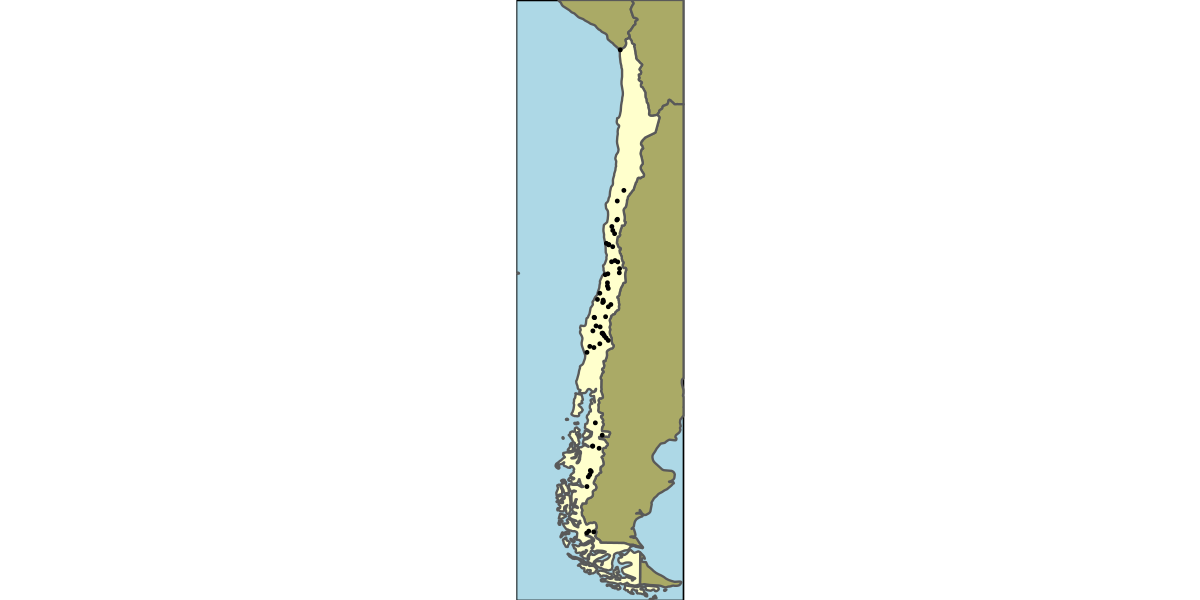

In [24]:
# Mapa de ubicación de cuencas
world <- st_read('Country files/ne_50m_admin_0_countries.shp')
world <- world %>% mutate(active = NAME_EN == 'Chile') # used to highlight Chile

data <- df %>% select(longitud, latitud) %>% unique()

world <- st_read('Country files/ne_50m_admin_0_countries.shp');

world %<>% mutate(active = NAME_EN == 'Chile'); # used to highlight Chile

# convert the dataframe to a sf geometry object
dsf <- data %>% 
    rowwise %>% 
    mutate(geometry = list(st_point(c(longitud, latitud)))) %>%
    st_as_sf(crs=st_crs(world));

world %>% st_crop(xmin=-90, xmax=-65, ymin=-60, ymax=-15) %>%
    ggplot() + 
    geom_sf(aes(fill=active), show.legend=FALSE) + # world map with Chile highlighted
    geom_sf(data=dsf, color='black', size=0.3) + # point overlay
    scale_fill_manual(values=c('#aaaa66', '#ffffcc')) + # color de los países
    scale_x_continuous(expand=c(0,0)) +
    scale_y_continuous(expand=c(0,0)) +
    theme_void() + # remove axis labels and gridlines
    theme(panel.background=element_rect(fill='lightblue')) 

 - Las 58 cuencas se extienden a lo largo de todo el territorio chileno.
 - Se puede ver que es posible hacer un clustering de acuerdo a su posición, debido a que las cuencas no están distribuidas equitativamente a lo largo del territorio chileno sino que tienden a concentrarse en ciertos puntos (Centro, Sur, y una en el Norte).

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EVE (ellipsoidal, equal volume and orientation) model with 4 components: 

 log-likelihood  n df       BIC       ICL
      -201.1351 58 17 -471.2978 -477.2325

Clustering table:
 1  2  3  4 
13 21 23  1 

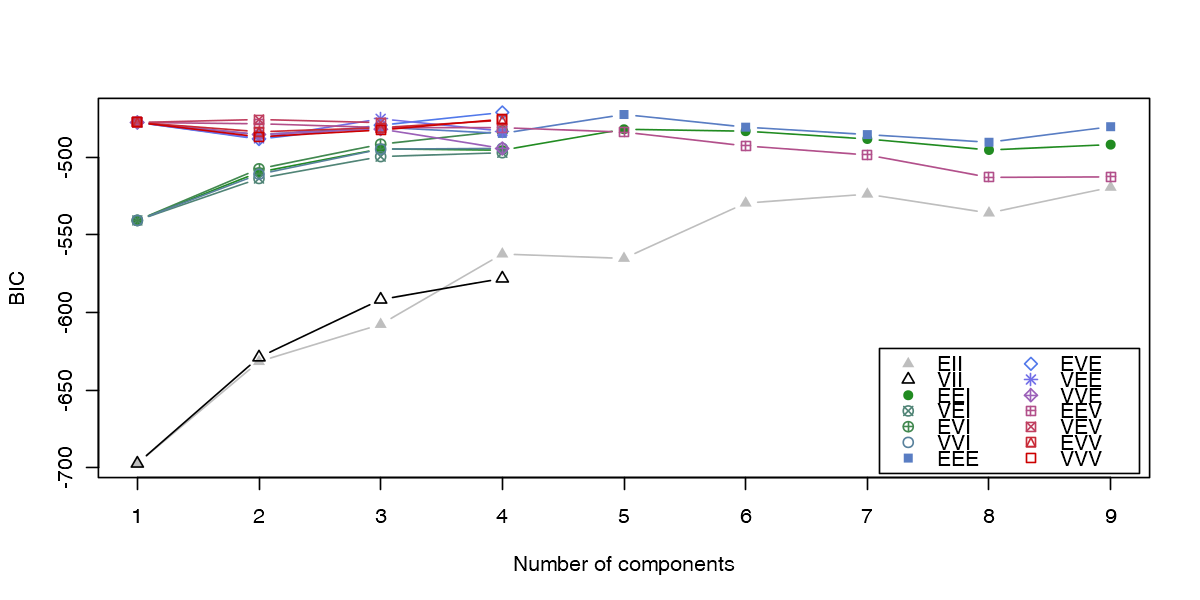

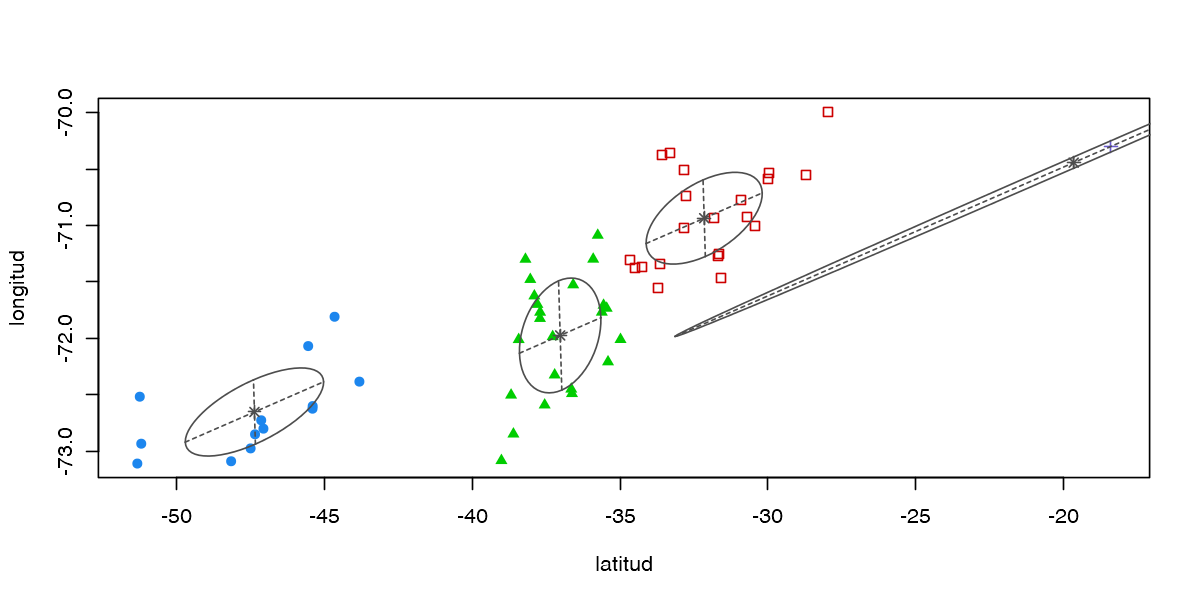

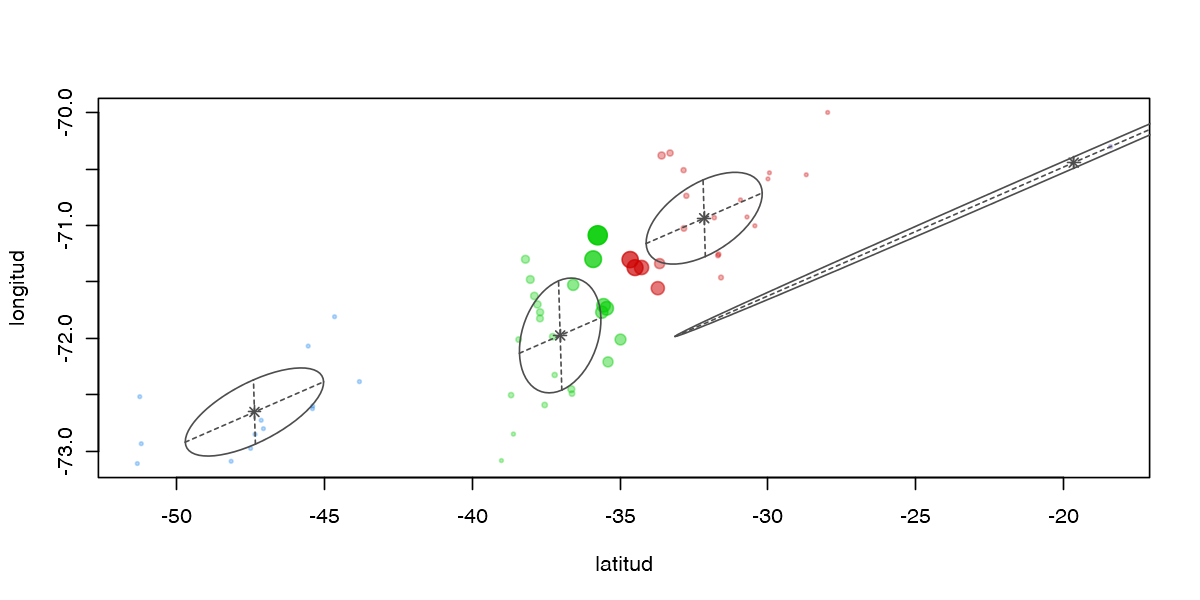

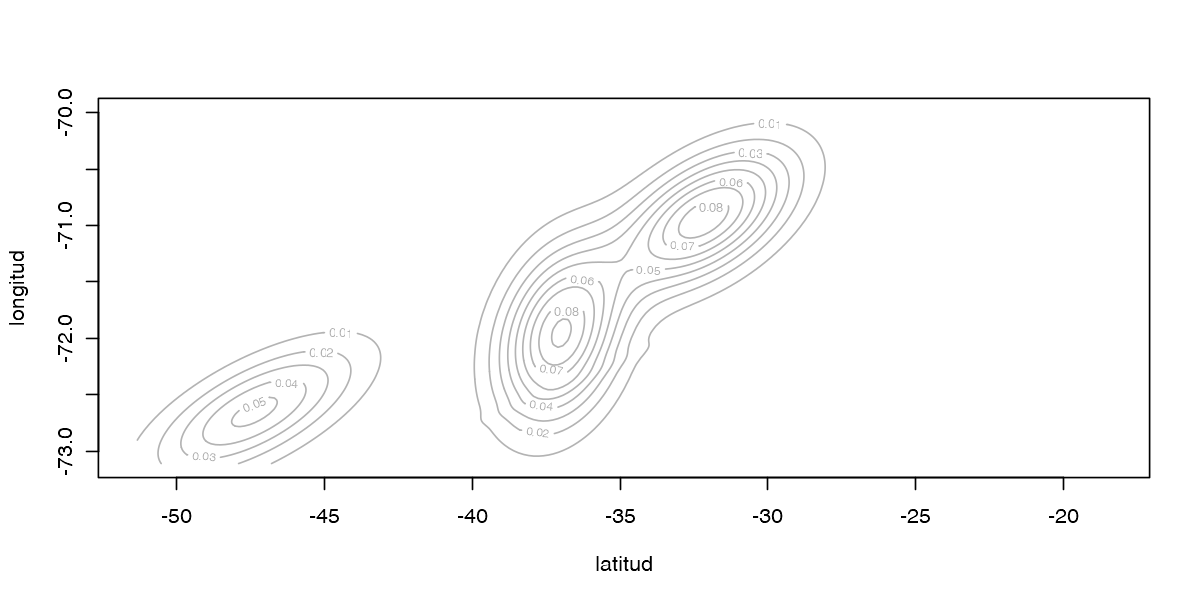

In [25]:
# cluster de cuencas por latitud y longitud
df_pre_cluster <- df %>% select(codigo_estacion, latitud, longitud) %>% unique()
d_clust <- Mclust(select(df_pre_cluster, -codigo_estacion), modelNames = mclust.options("emModelNames"))
summary(d_clust)
plot(d_clust)

In [26]:
df_cluster <- data.frame(df_pre_cluster, cluster=d_clust$classification)
df <- left_join(df, select(df_cluster, -latitud, -longitud) , by = "codigo_estacion")
df$cluster <- df$cluster %>% factor(levels=c("4","2","3","1"), labels=c("Norte", "Centro-Norte", "Centro-Sur", "Sur"))

although coordinates are longitude/latitude, st_intersection assumes that they are planar
Warning message:
"attribute variables are assumed to be spatially constant throughout all geometries"

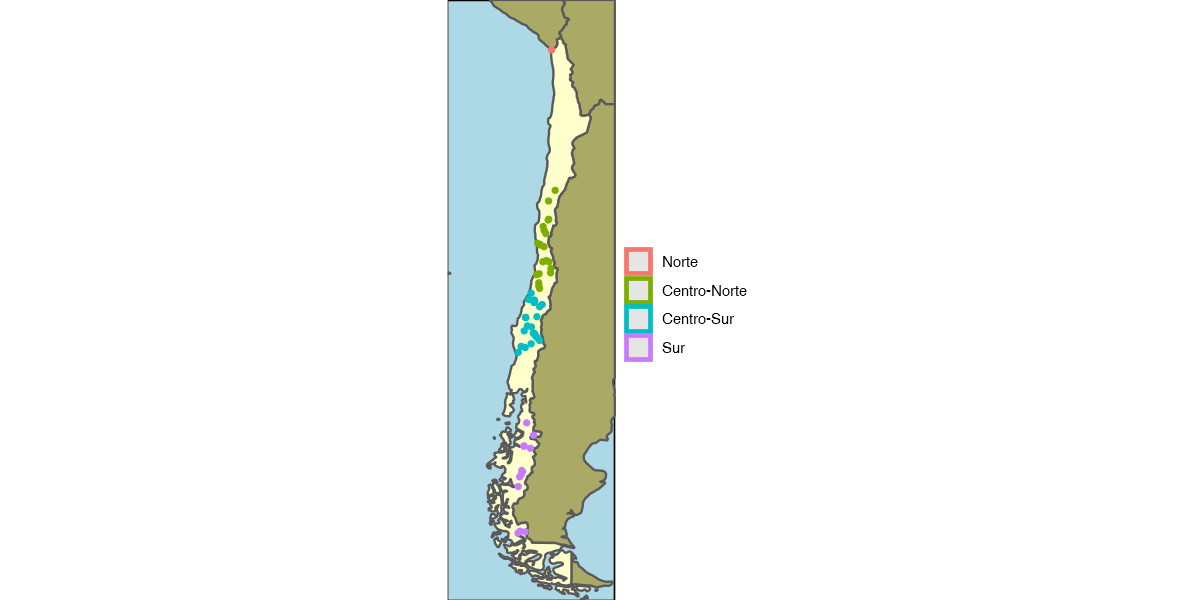

In [27]:
# Mapa con clustering
data <- df %>% select(longitud, latitud, cluster) %>% unique()

# conversión dataframe a objeto sf geometry
dsf_2 <- data %>% 
    rowwise %>% 
    mutate(geometry = list(st_point(c(longitud, latitud)))) %>%
    st_as_sf(crs=st_crs(world));

world %>% st_crop(xmin=-90, xmax=-65, ymin=-60, ymax=-15) %>%
    ggplot() + 
    geom_sf(aes(fill=active), show.legend=FALSE) + # mapa de chile
    geom_sf(data=dsf_2, aes(color=as.factor(cluster)), size=1) + # ubicaciones de cuencas
    scale_fill_manual(values=c('#aaaa66', '#ffffcc')) + # color de los países
    scale_x_continuous(expand=c(0,0)) +
    scale_y_continuous(expand=c(0,0)) +
    theme_void() +
    theme(panel.background=element_rect(fill='lightblue'),
         legend.title = element_blank())

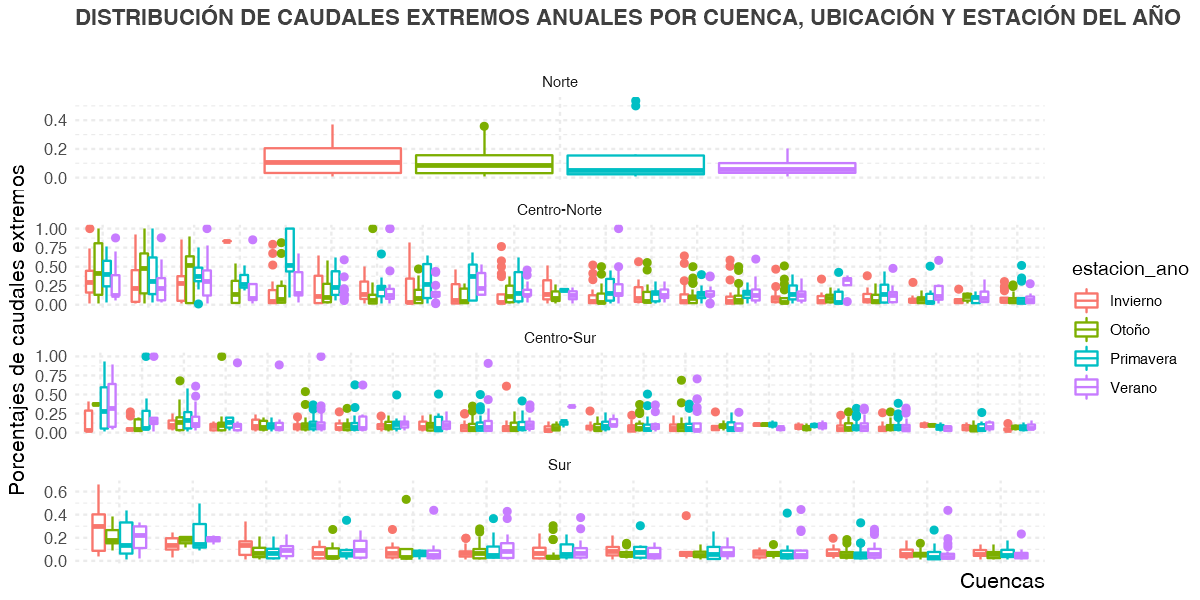

In [28]:
# Distribución de las cuencas según la variable dependiente
df %>%
mutate(year = lubridate::year(fecha)) %>%
group_by(year, codigo_estacion, cluster, estacion_ano, caudal_extremo) %>%
summarise(n = n()) %>%
mutate(percent = n/(sum(n))) %>%
filter(caudal_extremo==1) %>%
ggplot(aes(x=reorder(codigo_estacion, -percent, mean), y= percent, color= estacion_ano)) +
geom_boxplot() +
facet_wrap(~cluster, scales="free", nrow=4) + 
ggtitle("DISTRIBUCIÓN DE CAUDALES EXTREMOS ANUALES POR CUENCA, UBICACIÓN Y ESTACIÓN DEL AÑO", 
        subtitle = "") +
  labs(x= "Cuencas", y= "Porcentajes de caudales extremos") +
theme(axis.text.x = element_blank())

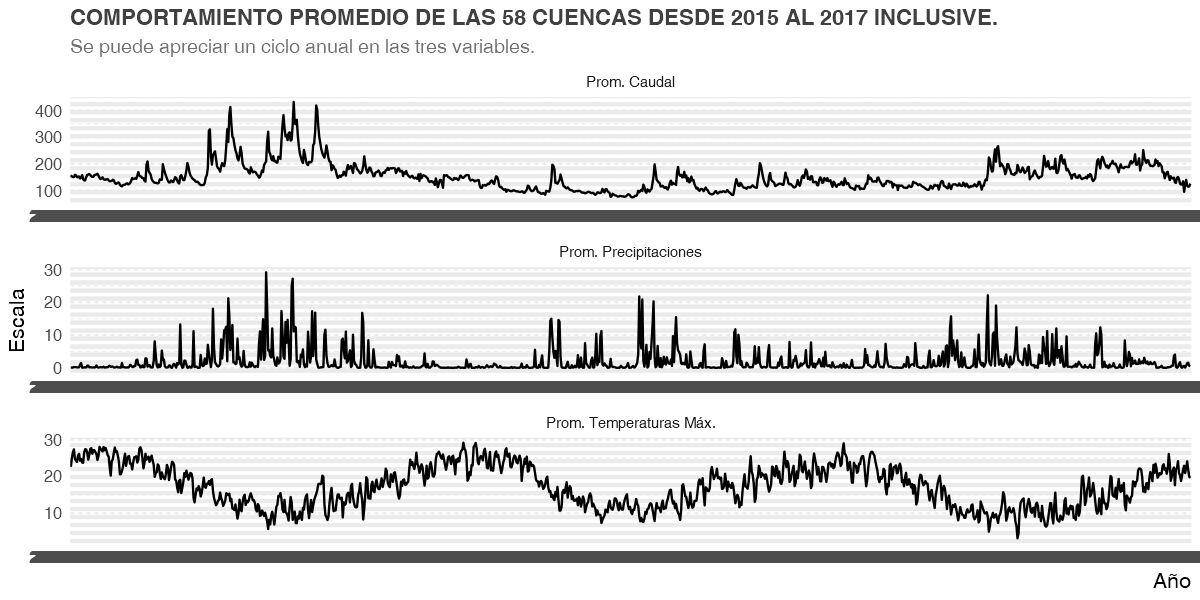

In [29]:
# Comportamiento anual promedio de las cuencas, desde 2015 a 2017, inclusive.
options(repr.plot.width=10, repr.plot.height=5)
df %>%
select(fecha, caudal, precip_promedio, temp_max_promedio) %>%
filter(lubridate::year(fecha) %in% c(2015,2016,2017)) %>% # No incluimos el 2018 debido a que no se tienen datos completos de tal año
group_by(fecha) %>%
summarise(prom_caudal = mean(caudal, na.rm=TRUE),
         prom_precip = mean(precip_promedio, na.rm=TRUE),
         prom_temp = mean(temp_max_promedio, na.rm=TRUE)) %>%
mutate(fecha = as.factor(fecha)) %>%
gather("key", "value", -fecha) %>%
mutate(key = plyr::mapvalues(key, 
                        c("prom_caudal", "prom_precip", "prom_temp"), 
                        c("Prom. Caudal", "Prom. Precipitaciones", "Prom. Temperaturas Máx."))) %>%
ggplot(aes(x=fecha, y=value)) +
geom_line(group = 1) +
facet_wrap(~key, nrow = 3, scales="free") +
theme(legend.title = element_blank()) +
ggtitle("COMPORTAMIENTO PROMEDIO DE LAS 58 CUENCAS DESDE 2015 AL 2017 INCLUSIVE.",
        subtitle = "Se puede apreciar un ciclo anual en las tres variables.") +
  labs(x= "Año", y= "Escala")

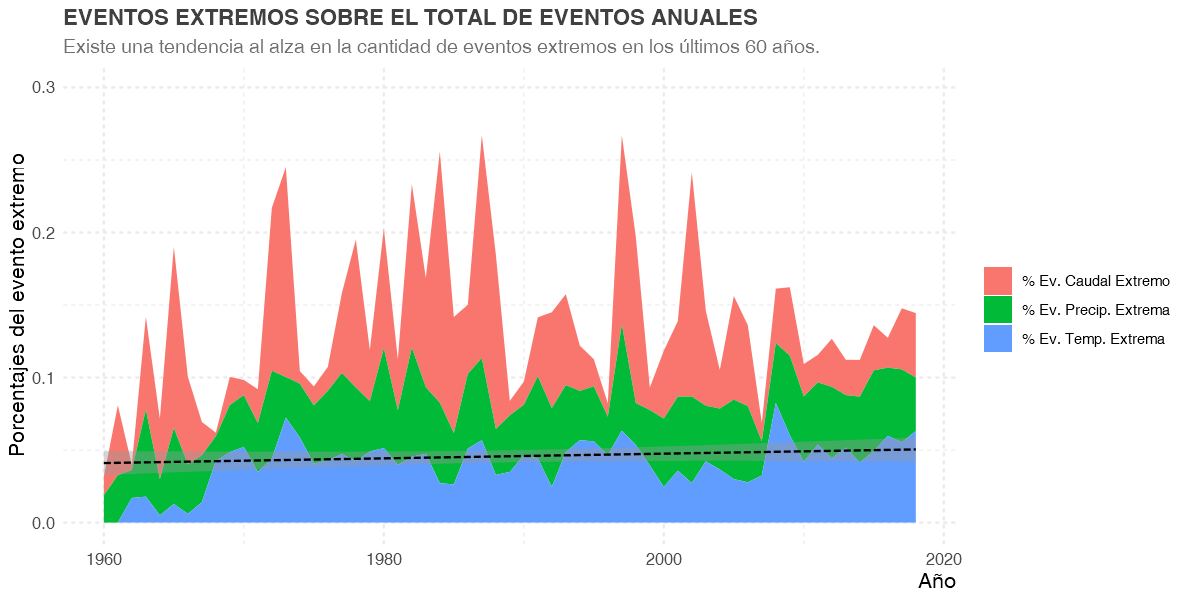

In [30]:
# Desglose de frecuencia relativa por cuenca de los eventos extremos, por año
# Primero, calcularemos el total de eventos y el total de eventos extremos, por año
df_6_total <- df %>%
  mutate(year = lubridate::year(fecha),
         if_extremo = rowSums(select(., caudal_extremo, temp_extremo, precip_extremo), na.rm=TRUE)) %>%
  group_by(year, if_extremo) %>%
  summarise(count = n()) %>%
  mutate(suma_ev_extremos = count*if_extremo,
         total_ev = sum(count)) %>%
  group_by(year, total_ev) %>%
  summarise(suma_ev_extremos = sum(suma_ev_extremos))

# Luego, calcularemos el desglose del total de eventos extremos
df_6_desglose <- df %>%
  mutate(year = lubridate::year(fecha)) %>%
  select(year, caudal_extremo, precip_extremo, temp_extremo) %>%
  group_by(year) %>%
  summarise(sum_caudal_extremo = sum(caudal_extremo, na.rm=TRUE),
            sum_precip_extremo = sum(precip_extremo, na.rm=TRUE),
            sum_temp_extremo = sum(temp_extremo, na.rm=TRUE))
# Unimos
df_6 <- merge(df_6_desglose, df_6_total, by="year", all.x = TRUE)

# Creamos los porcentajes por cada medición extrema (caudal, precipitación, y temperatura), y lo pasamos a formato largo para graficarlo
df_6 <- df_6 %>%
  mutate(perc_caudal_extremo = sum_caudal_extremo/total_ev, # Creación de porcentaje de caudal extremo
         perc_precip_extremo = sum_precip_extremo/total_ev, # Creación de porcentaje de precipitación extrema
         perc_temp_extremo = sum_temp_extremo/total_ev) %>% # Creación de porcentaje de temperatura extrema
  select(year, perc_caudal_extremo, perc_precip_extremo, perc_temp_extremo) %>%
  reshape(direction = "long", varying = names(.)[2:4], v.names = "valor", idvar = c("year"), timevar = "tipo", times= colnames(.[2:4])) # A formato largo
# Reemplazamos las etiquetas del gráfico
df_6$tipo <- df_6$tipo %>%  plyr::mapvalues(c("perc_caudal_extremo", "perc_precip_extremo", "perc_temp_extremo"),
                          c("% Ev. Caudal Extremo", "% Ev. Precip. Extrema", "% Ev. Temp. Extrema"))

# Graficamos
df_6 %>%  
  ggplot() + 
  geom_area(aes(x=year, y=valor, fill=tipo)) +
  geom_smooth(aes(x=year, y=valor), color="black", size=0.5, linetype="longdash", method = "lm") + # Línea de tendencia
scale_y_continuous(limits=c(0, 0.3)) +
ggtitle("EVENTOS EXTREMOS SOBRE EL TOTAL DE EVENTOS ANUALES", 
        subtitle = "Existe una tendencia al alza en la cantidad de eventos extremos en los últimos 60 años.") +
  labs(x= "Año", y= "Porcentajes del evento extremo") +
theme(legend.title = element_blank())

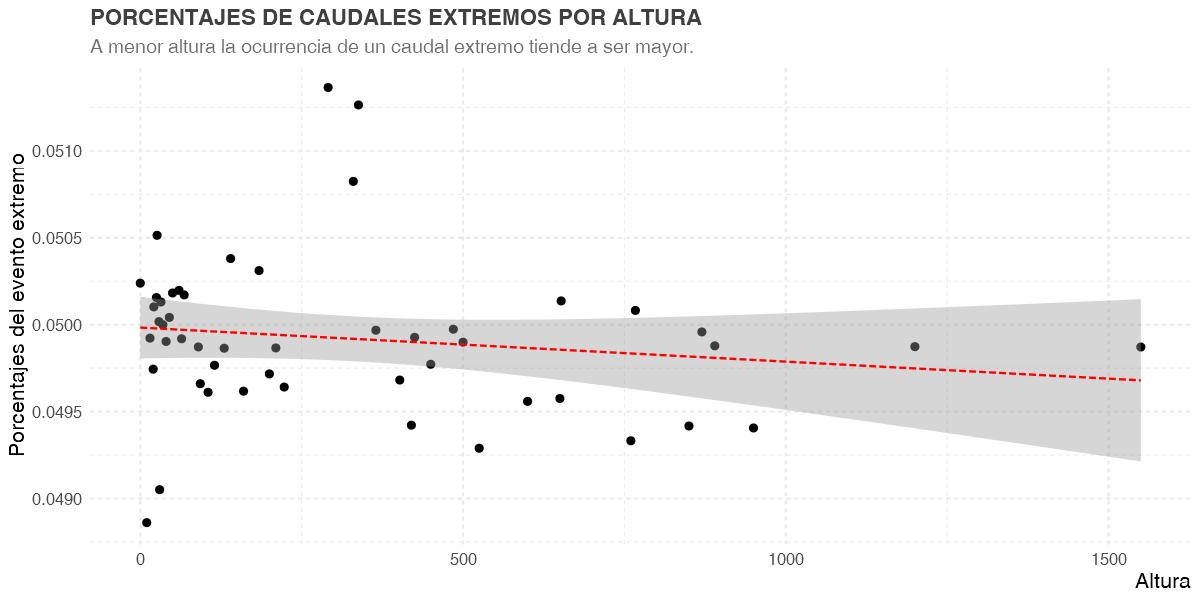

In [31]:
# Relación caudales extremos y su altura
df %>%
group_by(altura, caudal_extremo) %>%
summarise(n = n()) %>%
mutate(percent = n/sum(n)) %>%
filter(caudal_extremo == 1) %>%
ggplot(aes(x=altura, y=percent)) +
geom_point() +
geom_smooth(aes(x=altura, y=percent), color="red", size=0.5, linetype="longdash", method = "lm") + # Línea de tendencia
ggtitle("PORCENTAJES DE CAUDALES EXTREMOS POR ALTURA", 
        subtitle = "A menor altura la ocurrencia de un caudal extremo tiende a ser mayor.") +
  labs(x= "Altura", y= "Porcentajes del evento extremo")



### Resumen del Análisis Exploratorio
 - Existen 133 estaciones de medición, cada una asociadas a una de las 133 cuencas. Sin embargo, la cantidad de estaciones activas son 58.
 - Tanto la variable `caudal` como la variable `precip_promedio` presentan distribuciones sesgadas a la derecha con presencia de outliers, lo que hay que considerar convertirlas a `log()` con el fin de evitar ruidos en el modelamiento.
 - Existe una relación inversamente proporcional entre la altura y los eventos extremos de caudal.
 - Existe una tendencia al alza de la cantidad de eventos extremos en su conjunto a lo largo de los años.
 - Las variables de medición tienen ciclos anuales.
 - Existe una cantidad significativa de missing values en la base y de su comportamiento se puede inferir que se debe a la instalación paulatina de estaciones de medición a lo largo de los años, implicando en la falta de datos a los años previos de las nuevas instalaciones de medición. Sin embargo, existen frecuentes vacíos anuales de datos en múltiples cuencas, los cuales habría que reemplazarlos en la etapa de procesamiento con cuencas con distribuciones similares (o mejor, averiguar con el cliente posible causas de dichos vacíos anuales).